In [36]:
#Import the Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time 
from datetime import datetime
from config import weather_api_key
import requests
from scipy.stats import linregress

In [15]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [20]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | richard toll
City not found. Skipping...
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | hayden
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 1 | paraibano
Processing Record 15 of Set 1 | faya
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | saint-augustin
Processing Record 18 of Set 1 | ponta delgada
Processing Record 19 of Set 1 | kavieng
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | murgab
Processing Record 22 of Set 1 | tasiilaq
Processing Record 23 of Set 1 | am

Processing Record 40 of Set 4 | kiama
Processing Record 41 of Set 4 | deputatskiy
Processing Record 42 of Set 4 | copiapo
Processing Record 43 of Set 4 | canarana
Processing Record 44 of Set 4 | fairbanks
Processing Record 45 of Set 4 | abu dhabi
Processing Record 46 of Set 4 | sao filipe
Processing Record 47 of Set 4 | aklavik
Processing Record 48 of Set 4 | burgeo
Processing Record 49 of Set 4 | vanavara
Processing Record 50 of Set 4 | nchelenge
Processing Record 1 of Set 5 | lower hutt
Processing Record 2 of Set 5 | estreito
Processing Record 3 of Set 5 | jamestown
Processing Record 4 of Set 5 | abnub
Processing Record 5 of Set 5 | mwense
Processing Record 6 of Set 5 | griffith
Processing Record 7 of Set 5 | saint-pierre
Processing Record 8 of Set 5 | kuvshinovo
Processing Record 9 of Set 5 | nioki
Processing Record 10 of Set 5 | tromso
Processing Record 11 of Set 5 | walvis bay
Processing Record 12 of Set 5 | artigas
Processing Record 13 of Set 5 | iralaya
Processing Record 14 of S

Processing Record 31 of Set 8 | presidente epitacio
Processing Record 32 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 33 of Set 8 | portland
Processing Record 34 of Set 8 | suslovo
Processing Record 35 of Set 8 | kenai
Processing Record 36 of Set 8 | erhlin
City not found. Skipping...
Processing Record 37 of Set 8 | ambon
Processing Record 38 of Set 8 | naze
Processing Record 39 of Set 8 | puerto escondido
Processing Record 40 of Set 8 | thurso
Processing Record 41 of Set 8 | acarau
Processing Record 42 of Set 8 | mocuba
Processing Record 43 of Set 8 | yatou
Processing Record 44 of Set 8 | san cristobal
Processing Record 45 of Set 8 | pennagaram
Processing Record 46 of Set 8 | tomigusuku
Processing Record 47 of Set 8 | fallon
Processing Record 48 of Set 8 | nantucket
Processing Record 49 of Set 8 | wajir
Processing Record 50 of Set 8 | ust-nera
Processing Record 1 of Set 9 | rockport
Processing Record 2 of Set 9 | gornopravdinsk
Processing Record 3 of Set 9 | aly

Processing Record 17 of Set 12 | mehamn
Processing Record 18 of Set 12 | tavda
Processing Record 19 of Set 12 | vostok
Processing Record 20 of Set 12 | mongoumba
Processing Record 21 of Set 12 | havelock
Processing Record 22 of Set 12 | yarada
Processing Record 23 of Set 12 | santa rosa
Processing Record 24 of Set 12 | guerrero negro
Processing Record 25 of Set 12 | san ramon
Processing Record 26 of Set 12 | korla
Processing Record 27 of Set 12 | bairiki
Processing Record 28 of Set 12 | vanino
Processing Record 29 of Set 12 | lavrentiya
Processing Record 30 of Set 12 | gizo
Processing Record 31 of Set 12 | opuwo
Processing Record 32 of Set 12 | chernushka
Processing Record 33 of Set 12 | gigmoto
Processing Record 34 of Set 12 | myaundzha
Processing Record 35 of Set 12 | krasnyy chikoy
Processing Record 36 of Set 12 | prachuap khiri khan
Processing Record 37 of Set 12 | khabary
Processing Record 38 of Set 12 | shiyan
Processing Record 39 of Set 12 | qinzhou
Processing Record 40 of Set 1

In [21]:
len(city_data)

574

In [22]:
# Convert the array of dictionaires to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.4081,57.7000,82.69,89,75,14.97,MU,2022-01-21 16:26:34
1,Hayden,47.7660,-116.7866,33.96,95,75,3.44,US,2022-01-21 16:21:45
2,Yellowknife,62.4560,-114.3525,-25.08,75,20,5.75,CA,2022-01-21 16:26:35
3,Kodiak,57.7900,-152.4072,38.71,93,100,0.00,US,2022-01-21 16:26:35
4,Ponta Do Sol,32.6667,-17.1000,70.12,51,100,13.40,PT,2022-01-21 16:26:36
5,Khatanga,71.9667,102.5000,15.89,94,100,15.57,RU,2022-01-21 16:26:36
6,Hilo,19.7297,-155.0900,69.24,88,75,4.61,US,2022-01-21 16:21:58
7,Cape Town,-33.9258,18.4232,93.11,46,0,5.01,ZA,2022-01-21 16:24:01
8,Rikitea,-23.1203,-134.9692,77.81,75,100,9.62,PF,2022-01-21 16:26:37
9,Tuktoyaktuk,69.4541,-133.0374,-27.40,68,75,5.75,CA,2022-01-21 16:26:37


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [24]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2022-01-21 16:26:34,-20.4081,57.7000,82.69,89,75,14.97
1,Hayden,US,2022-01-21 16:21:45,47.7660,-116.7866,33.96,95,75,3.44
2,Yellowknife,CA,2022-01-21 16:26:35,62.4560,-114.3525,-25.08,75,20,5.75
3,Kodiak,US,2022-01-21 16:26:35,57.7900,-152.4072,38.71,93,100,0.00
4,Ponta Do Sol,PT,2022-01-21 16:26:36,32.6667,-17.1000,70.12,51,100,13.40
...,...,...,...,...,...,...,...,...,...
569,Dhandhuka,IN,2022-01-21 16:42:00,22.3667,71.9833,74.34,61,2,15.14
570,Saint-Felicien,CA,2022-01-21 16:42:01,48.6501,-72.4491,-15.92,63,0,2.30
571,Bojonegoro,ID,2022-01-21 16:42:01,-7.1502,111.8817,74.61,95,100,4.72
572,Kafue,ZM,2022-01-21 16:42:02,-15.7691,28.1814,66.43,88,96,4.34


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract Relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
lng = city_data_df["Lng"]

In [31]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'01/21/22'

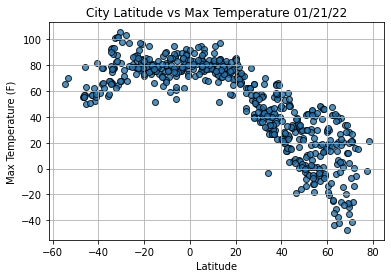

In [32]:
# Build the scatter plot for latitude vs max temp

plt.scatter(lats,
           max_temps,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure
plt.savefig("weather_data/City_Latitude_vs_Max_Temperature.png")

#Show plot.
plt.show()

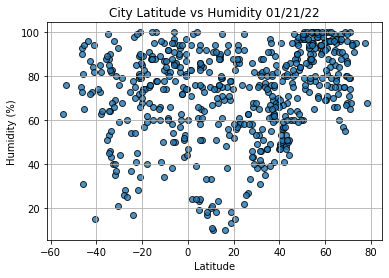

In [33]:
# Build the scatter plot for latitude vs humidity

plt.scatter(lats,
           humidity,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph properties.
plt.title(f"City Latitude vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure
plt.savefig("weather_data/City_Latitude_vs_Humidity_Percentage.png")

#Show plot.
plt.show()

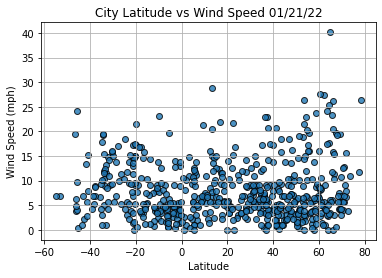

In [35]:
# Build the scatter plot for latitude vs Cloudiness

plt.scatter(lats,
           wind_speed,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph properties.
plt.title(f"City Latitude vs Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure
plt.savefig("weather_data/City_Latitude_vs_Wind_Speed.png")

#Show plot.
plt.show()

In [42]:
# Create a function to create perform linear regression with the weather data and plot a regreession line and the equation
# with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plot  and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [45]:
#Create northern and Southern Hemisphere Dataframes.
north_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
south_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

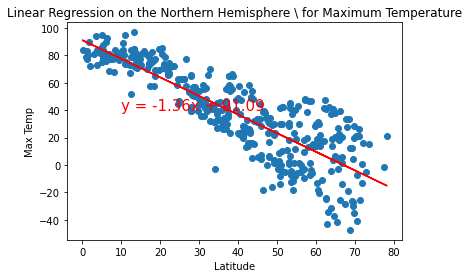

In [46]:
# Linear regression on the Northern Hemipshere.
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for Maximum Temperature", 
                       "Max Temp", (10,40))

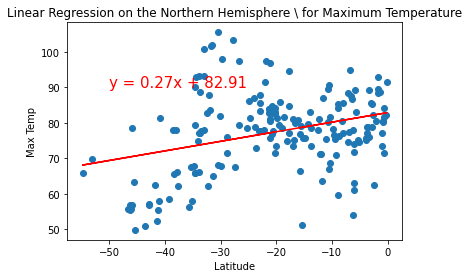

In [48]:
# Linear regression on the Southern Hemipshere.
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for Maximum Temperature", 
                       "Max Temp", (-50,90))

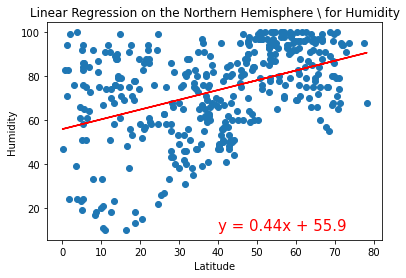

In [50]:
# Linear regression on the Northern Hemipshere Humidity.
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for Humidity", 
                       "Humidity", (40,10))

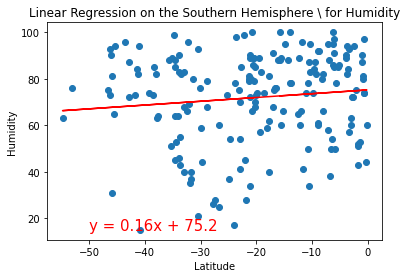

In [51]:
# Linear regression on the Southern Hemipshere Humidity.
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \ for Humidity", 
                       "Humidity", (-50,15))

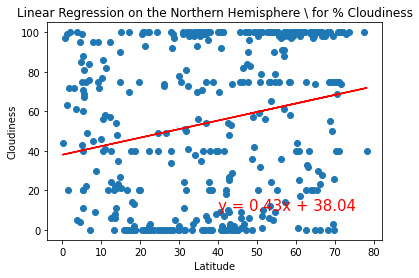

In [55]:
# Linear regression on the Northern Hemipshere Cloudiness.
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for % Cloudiness", 
                       "Cloudiness", (40,10))

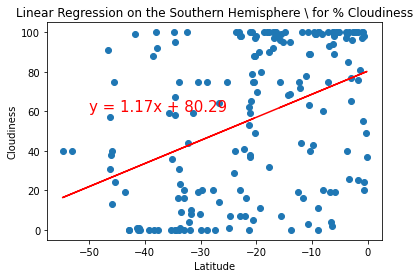

In [57]:
# Linear regression on the Southern Hemipshere Cloudiness.
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \ for % Cloudiness", 
                       "Cloudiness", (-50,60))

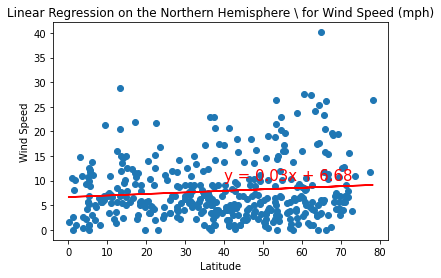

In [58]:
# Linear regression on the Northern Hemipshere Cloudiness.
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for Wind Speed (mph)", 
                       "Wind Speed", (40,10))

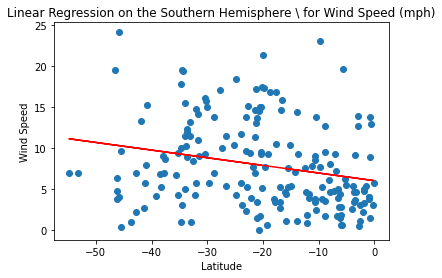

In [60]:
# Linear regression on the Northern Hemipshere Cloudiness.
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \ for Wind Speed (mph)", 
                       "Wind Speed", (-50,35))